In [1]:
import numpy as np
import matplotlib.pyplot as plt


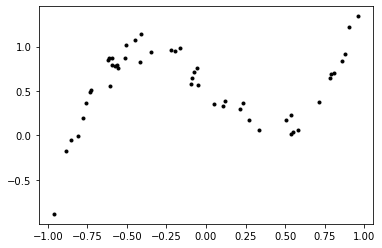

In [21]:
# Polynomial interpolation

def p(t):
    return 3*(t + 0.2)**3 - 2*(t + 0.5)**2 + 1

N = 50
sig = 0.1

x = np.sort(np.random.rand(N)*2 - 1)
y = p(x) + sig * np.random.randn(N)

plt.plot(x, y, 'k.')

/Users/khoras0000/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


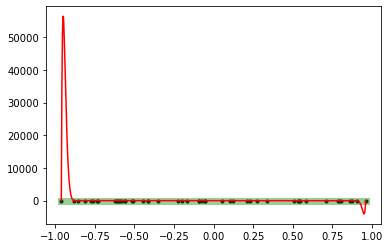

In [22]:
K = 40
x_grid = np.linspace(x.min(), x.max(), 1000)
# x_grid = np.linspace(-1, 1, 1000)

coeff = np.polyfit(x, y, K)
y_hat = np.poly1d(coeff)(x_grid)

plt.plot(x, y, 'k.')
plt.plot(x_grid, p(x_grid), 'g', linewidth=7, alpha=0.4)
plt.plot(x_grid, y_hat, 'r')


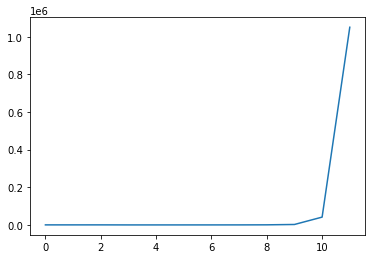

In [23]:
# the polynomial degree K is a hyperparameter!

alpha = 0.75
K_max = 12


mse = np.zeros((K_max))
for i_fold in range(1000):

    idx_train = np.random.randint(0, N, int(N*alpha))
    idx_test = np.setdiff1d(np.arange(N), idx_train)

    x_train, y_train = x[idx_train], y[idx_train]
    x_test, y_test = x[idx_test], y[idx_test]

    # das ist verboten!
    for K in range(K_max):
        coeff = np.polyfit(x_train, y_train, K)
        y_hat_test = np.poly1d(coeff)(x_test)
        mse[K] += np.sum((y_hat_test - p(x_test))**2)
    
plt.plot(np.arange(K_max), mse / 20)